In [6]:
# This module makes it easy to adapt your existing visualization code to create an animation.
# Run for the first time
# %conda install -c coecms celluloid

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
import sklearn

## Simple Linear Regression
### **Phương trình**
$$\large y = w*x + b$$

- $w$: slope or weight
- $b$: intercept or bias 

### **Cost Functions**

$$J(w,b) = \frac{1}{n}\sum_{i=1}^{N}(y_{i} - \hat y)^{2} = \frac{1}{n}\sum_{i=1}^{N}(y_{i} - (wx_{i} + b))^{2}$$

 ### **Gradient**

$$
\nabla J(w,b) = \begin{bmatrix}
\frac{\delta J(w,b)}{\delta w} \\
\frac{\delta J(w,b)}{\delta b}
\end{bmatrix}
= \begin{bmatrix}
\frac{2}{n}\sum_{i=1}^{N} -x_{i}(y_{i} - (wx_{i}+b)) \\
\frac{2}{n}\sum_{i=1}^{N} -(y_{i} - (wx_{i}+b))
\end{bmatrix}
$$

### **Gradient Decent**

$$
w^{t+1} = w^{t} - \eta\frac{\delta J(w,b)}{\delta w}
$$

$$
b^{t+1} = b^{t} - \eta\frac{\delta J(w,b)}{\delta b}
$$

- $\eta$: Learning rate


### **Implementation**

*Note*

- epoch: Training round

In [8]:
# Simple Linear Regression model

class LinearRegression(object):
    def __init__(self, w=1, b=1, lr=0.01):
        self.lr = lr
        self.w = np.array([[w]])
        self.b = np.array([[b]])
        
    def cost(self, x, y):
        pred = x@self.w + self.b # Predicted y value
        e = y - pred # Error term or residual
        return np.mean(e**2) # Mean squared error
    
    def fit(self, x, y):
        pred = x@self.w + self.b # Predicted y value
        e = y - pred # Error term or residual
        dJ_dw = (np.mean(e*(-2*x), axis=0)) # partial derivate of J with respect to w
        dJ_db=(np.mean(e*(-2),axis=0)) # partial derivate of J with respect to b
        self.w = (self.w.T-self.lr*dJ_dw).T  # update w
        self.b = self.b - self.lr*dJ_db    # update b
    
    def predict(self, x):
        return (x @ self.w.T + self.b)  # return predicted values

    def params(self):
        return (self.w,self.b)   # return parameters

# Không muốn đưa epoch - Training round vào đây là để dễ dàng vẽ lại sau mỗi lần training, để tạo animation    

### Animation of Gradient Decent in simple Linear Regression

In [9]:
# Testing data
# Introduce training data
x_train = np.array([     
    [1],
    [2],
    [4],
    [5],
    [6],
    [7]
])

y_train = np.array([     
    [4],
    [-12],
    [3],
    [-11],
    [-5],
    [-17]
])


# Introduce lists where data points are being stored: 
w_list=[]   # list contains weights
b_list=[]   # list contains biases
c_list=[]   # list contains costs 
ys_list=[]  # store arrays of predicted y-values for xs ( -> plot regression line!) 
cl_list = [] # list contains predicted y-values for x_train ( -> plot connecting lines!) 

xs= np.array([    # set x-values for regression line plot               
            [-3],
             [10]
             ])

# Train model: 
model=LinearRegression(w=3,b=-1,lr=0.001) # set initial parameters and learning rate 

for i in range(60000):      # set number of epochs
    w_list.append(model.params()[0])    # append weights (=slopes) to list
    b_list.append(model.params()[1])    # append biases (=y-intercepts) to list
    c_list.append(model.cost(x_train,y_train))  # append costs to list
    ys_list.append(model.predict(xs).T)     # append pairs of predicted y-values for xs 
    cl_list.append(model.predict(x_train).T) # append predicted y-values for x_train to list
    model.fit(x_train, y_train) # fit model


# print parameters and costs after all epochs
print("weight: " + str( model.params()[0]) )  
print("y-intercept: " + str( model.params()[1]) )
print("costs: "+ str(model.cost(x_train, y_train)))  

weight: [[-2.]]
y-intercept: [[2.]]
costs: 42.66666666666668


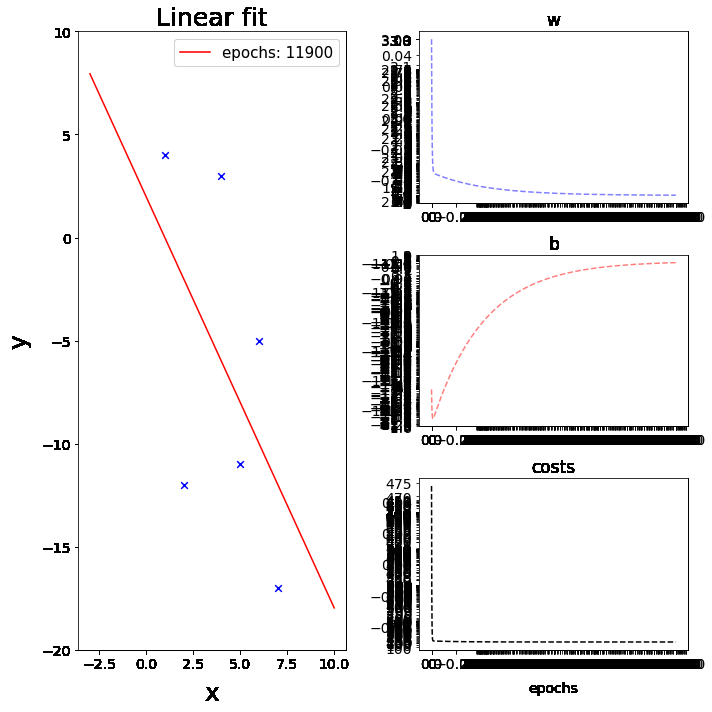

In [10]:
# Define which epochs/data points to plot
a=np.arange(0,50,1).tolist()
b=np.arange(50,100,5).tolist()
c=np.arange(100,12000,200).tolist()
p = a+b+c # points we want to plot

# Turn lists into arrays
w= np.array(w_list).flatten()
b= np.array(b_list).flatten()
c= np.array(c_list).flatten()
ys = np.array(ys_list) 
p=np.array(p)

# Create first animation: 
fig = plt.figure(figsize=(10,10)) # create figure
labelsize_ = 14
camera = Camera(fig)  # create camera
for i in p:
    ax1=fig.add_subplot(3, 2, 2)  
    ax1.plot(w[0:i], color='blue', linestyle="dashed", alpha=0.5)
    ax1.set_title("w", fontsize=17)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis. 
    ax2.plot(b[0:i], color='red', linestyle="dashed", alpha=0.5)
    ax2.set_title("b", fontsize=17)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax3=fig.add_subplot(3, 2, 6, sharex=ax1) 
    ax3.plot(c[0:i],color='black',linestyle="dashed")
    ax3.set_title("costs", fontsize=17)
    ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax3.set_xlabel("epochs", fontsize=14, labelpad=10)

    ax0=fig.add_subplot(1, 2, 1) # plot fit
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(),
                 color='r', label=str(i))  # set legend; flatten arrays to get plots!
    ax0.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([-20, 10])

    plt.tight_layout()
    camera.snap() # take snapshot after each frame/iteration
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500) # create animation 
animation.save('SimpleLinReg_1.gif', writer = 'imagemagick') # save animation 